# Projeto Ciência de Dados - Previsão de Vendas

- Nosso objetivo é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hastag investe: TV, Jorbal e Rádio.
- Base de Dados: https://drive.google.com/drive/folders/1JLa3vHvF_U4J4wTVkjKy0wn6NrrHAkPK?usp=sharing

## Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção dos Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algorítmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas
- Nosso objetivo é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hastag investe: TV, Jorbal e Rádio.
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a base de dados

In [1]:
import pandas as pd

tabela = pd.read_csv('22-07-28/advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
print(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada ítem estão distruibuídas
- Vamos ver a correlação entre cada um dos ítens

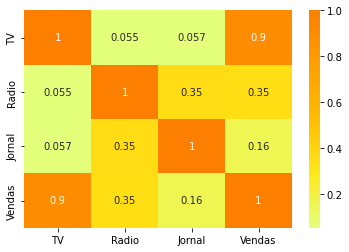

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# display(tabela.corr())

# Criar o gráfico
sns.heatmap(tabela.corr(), cmap='Wistia', annot=True)

# Exibir o gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o modelo de Machine Learning
- Separando em dados de treino e dados de teste

In [7]:
x = tabela[['TV', 'Radio', 'Jornal']]
y = tabela['Vendas']

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar
- Regressão Linear
- Random Forest (Árvore de Decisão)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste de AI e Avaliação do Melhor Modelo
- Vamos usar o R<sup>2</sup> -> diz o % que o nosso modelo consegue explicar o que acontece

In [10]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9654806791897889


#### Visualização Gráfica das Previsões

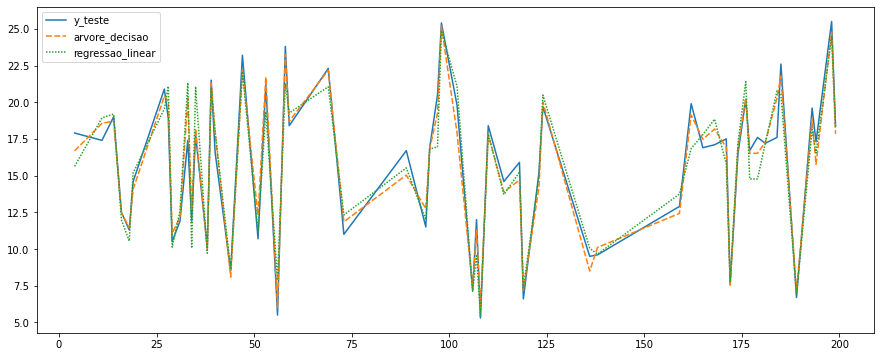

In [11]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['arvore_decisao'] = previsao_arvoredecisao
tabela_auxiliar['regressao_linear'] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [12]:
# O melhor modelo é a árvore de decisão

novos = pd.read_csv('22-07-28/novos.csv')
display(novos)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [13]:
print(modelo_arvoredecisao.predict(novos))

[ 7.66   8.704 19.947]
